In [60]:
%matplotlib inline
import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [61]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])


# Change the conditions below to compare between other two digits.
class1Indices = (y==0)
class2Indices = (y==1)

x1 = X[class1Indices]
x2 = X[class2Indices]

Xtrain = np.concatenate((x1,x2),axis=0)
ytrain = np.concatenate((np.zeros(x1.shape[0]),np.ones(x2.shape[0])),axis=0) # associating 0's with 0 and 1's with 1

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)



c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Split the data to training, testing, and validation subsets
## Component 1.1 - 70% training, 10% validation, and 20% test

In [62]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets

# First split - 70% training and 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(Xtrain, ytrain,test_size=0.3, random_state=1)

# Second split - 30% temporary into 20% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=1) 

# X_train & y_train = 70%, X_test & y_test = 20%, X_val & y_val = 10%

Nsamples = X_train.shape[0] # samples = 10346 for 0 and 1's subset
Nfeatures = X_train.shape[1] # features = 784



# Accuracy of a classifier
## Component 1.2 - write function "testLinearClassifier" that taking a (weights), X (test dataset), and y (label)

In [63]:
from numpy import size


def testLinearClassifier(a,Xt,yt):
    
    # YOUR CODE HERE
    """
    Parameters:
    - a: Coefficients of the linear classifier [wt,w0]
    - Xt: Dataset(Samples,Features) 
    - y: True labels to check classifier
    """
    
    
    # Calculate the predicted labels using the weights
    
    predictions = np.dot(Xt,a[:-1])+ a[-1] # Predict discriminate
    y_pred = np.where(predictions > 0, 1, 0)
    #np.sign(predictions)
    misclass = np.sum(y_pred != yt)
    accuracy = 1 - misclass/len(yt)
    return misclass,accuracy
    


## Define and test gaussianClassifierWithIdentityCovariance 
## Component 1.3
## With Discriminant:
$$y(\mathbf x) = \underbrace{(\mu_2-\mu_1)^T}_{\mathbf w^T} ~\mathbf x- \underbrace{\mathbf w^T\left(\frac{\mu_1+\mu_2}{2}\right)}_{w_0}$$


y1(x) Train misclassifications:  70, Training Accuracy: 99.32%
y1(x) Validation Misclassifications:  14, Validation Accuracy: 99.05%
y1(x) Test Misclassifications:  22, Test Accuracy: 99.26%


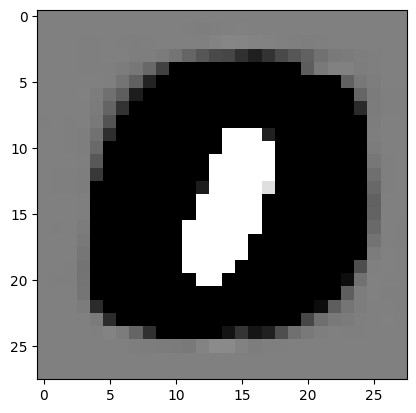

In [64]:
#------TRAINING CODE --------------

import array
from turtle import color
from matplotlib.cbook import flatten
from matplotlib.pyplot import cool
from numpy import float64


def gaussianClassifierWithIdentityCovariance(Xtrain1,ytrain1):
    """
    Parameters:
    - Xt: Dataset(Samples,Features) 
    - y: True labels to check classifier
    
    Return:
    - a1: Calculated weight vector
    """
   
    # Separate the data into two classes
    a = 0.01*np.random.randn(Nfeatures+1,1)
    class_1_data =  Xtrain1[ytrain1 == 0]
    class_2_data = Xtrain1[ytrain1 == 1]
    
    # Create mean subtracted arrays
    class_mean = np.mean(Xtrain1,axis=0)
    mu1 = np.mean(class_1_data,axis=0)
    mu2 = np.mean(class_2_data,axis=0)
      
    w = mu2-mu1
    w0 = 0.5 * (np.dot(mu1,mu1) - np.dot(mu2,mu2))
    a1 = np.concatenate([w, np.array([w0])])
    
    return a1
    #YOUR CODE HERE


#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a1 = gaussianClassifierWithIdentityCovariance(X_train,y_train)

plt.imshow(np.reshape(a1[0:784],(28,28)),cmap='gray',vmin=-5,vmax=5)

train,tacc = testLinearClassifier(a1,X_train,y_train)
val,vacc = testLinearClassifier(a1,X_val,y_val)
test,testacc = testLinearClassifier(a1,X_test,y_test)

print(f'\ny1(x) Train misclassifications:  {train}, Training Accuracy: {tacc*100:.2f}%')
print(f'y1(x) Validation Misclassifications:  {val}, Validation Accuracy: {vacc*100:.2f}%')
print(f"y1(x) Test Misclassifications:  {test}, Test Accuracy: {testacc*100:.2f}%")







## Define and test gaussianClassifierWithCommonCovariance
## Component 1.4

Complete your code
cov shape:  (784, 784)

y2(x) Train misclassifications:  22, Training Accuracy: 99.79%
y2(x) Validation Misclassifications:  3, Validation Accuracy: 99.80%
y2(x) Test Misclassifications:  5, Test Accuracy: 99.83%


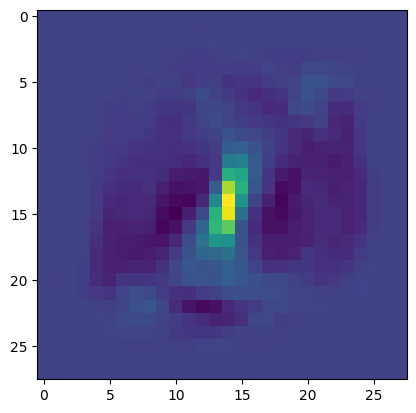

In [65]:
#------TRAINING CODE --------------

from xml.etree.ElementTree import tostring
from matplotlib import axes
from numpy import str_


def gaussianClassifierWithCommonCovariance(X_train2,y_train2):

    a = 0.01*np.random.randn(Nfeatures,1)
    print("Complete your code")
    """
    Gaussian classifier with a common covariance matrix.

    Parameters:
    - X_train2: Training dataset (numpy array)
    - y_train2: Labels for the training dataset (numpy array)

    Returns:
    - a2: Coefficients of the linear classifier [w^T, w0] (numpy array)
    """

    # Separate the data into two classes
    class_1_data = X_train2[y_train2 == 0]
    class_2_data = X_train2[y_train2 == 1]

    # Estimate the mean vectors
    mu1 = np.mean(class_1_data, axis=0)
    mu2 = np.mean(class_2_data, axis=0)
       

    # Estimate the common covariance matrix
    cov_matrix = np.cov(X_train2,rowvar=False)+1e4*np.eye(Nfeatures)
    inv = np.linalg.inv(cov_matrix)
    #+1e-4*np.eye(Nfeatures) # single matrix solution (not divide by zero)
    print("cov shape: ", cov_matrix.shape)
    w = inv @ (mu2 - mu1)
    
    w0 = 0.5 * ((mu1 @ (inv @ mu1)) - (mu2 @ (inv @ mu2)))
    # Discriminant function coefficients
    #cov_inv = np.linalg.inv(cov_matrix)
    
    # print("cov inv shape: ", cov_inv.shape)
    # a2 = cov_inv @ (mu2-mu1)
    # print(f"a2 shape: {a2.shape}")
    a2 = np.concatenate([w, np.array([w0])])
    return a2
    
    #return a
    #YOUR CODE HERE


#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a2 = gaussianClassifierWithCommonCovariance(X_train,y_train)
# a[:-1])+ a[-1]
plt.imshow(np.reshape(a2[:-1],(28,28)))
#a2 = np.append(a2,1)
#a2 = np.reshape(a2,(784,-1))


train,tacc = testLinearClassifier(a2,X_train,y_train)
val,vacc = testLinearClassifier(a2,X_val,y_val)
test,testacc = testLinearClassifier(a2,X_test,y_test)
print(f'\ny2(x) Train misclassifications:  {train}, Training Accuracy: {tacc*100:.2f}%')
print(f'y2(x) Validation Misclassifications:  {val}, Validation Accuracy: {vacc*100:.2f}%')
print(f"y2(x) Test Misclassifications:  {test}, Test Accuracy: {testacc*100:.2f}%")


# Component 1.5 Logistic Regression
## Define and test logisticRegression 

You may choose the step size as 1e-4. You can try changing it.

Use the expit() function from scipy.special.expit to implement sigmoid without overflow errors 


y3(x) Train misclassifications:  16, Training Accuracy: 99.85%
y3(x) Validation Misclassifications:  4, Validation Accuracy: 99.73%
y3(x) Test Misclassifications:  6, Test Accuracy: 99.80%


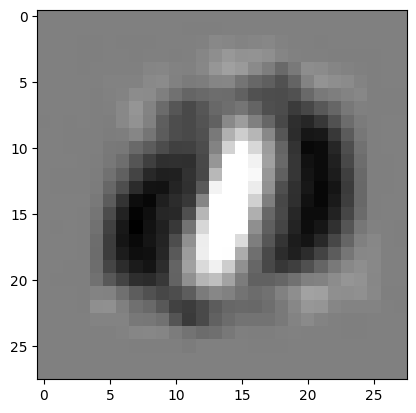

In [66]:

    
def logisticRegression(X3, y3, iterations=100, step_size=1e-4):
    # Add a bias term to the input features
    X_bias = np.concatenate([X3, np.ones((X3.shape[0], 1))], axis=1)
    
    # Initialize weights before loop
    a3 = np.zeros(X_bias.shape[1])
    
    for _ in range(iterations):
        # Predict probabilities
        y_pred = expit((np.dot(X_bias,a3)))
        
        # Calculate gradient of log-likelihood
        gradient = np.dot(X_bias.T,(y3 - y_pred))
        
        # Update the weights using gradient ascent
        a3 += step_size * gradient
        
    return a3

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a3 = logisticRegression(X_train,y_train,iterations=100)
plt.imshow(np.reshape(a3[:-1],(28,28)),cmap='gray',vmin=-40,vmax=40)


train,tacc = testLinearClassifier(a3,X_train,y_train)
val,vacc = testLinearClassifier(a3,X_val,y_val)
test,testacc = testLinearClassifier(a3,X_test,y_test)

print(f'\ny3(x) Train misclassifications:  {train}, Training Accuracy: {tacc*100:.2f}%')
print(f'y3(x) Validation Misclassifications:  {val}, Validation Accuracy: {vacc*100:.2f}%')
print(f"y3(x) Test Misclassifications:  {test}, Test Accuracy: {testacc*100:.2f}%")


## Component 1.6 - Logistic Regression with Regularization


y4(x) Train misclassifications:  15, Training Accuracy: 99.86%
y4(x) Validation Misclassifications:  4, Validation Accuracy: 99.73%
y4(x) Test Misclassifications:  6, Test Accuracy: 99.80%


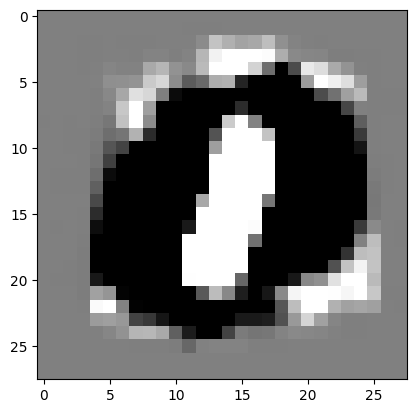

In [67]:

def logisticRegressionWithRegularization(X4,y4,iterations=100,step_size=1e-4,lam=0,verbose=False):
    # Add a bias term to the input features
    X_bias = np.concatenate([X4, np.ones((X4.shape[0], 1))], axis=1)
    
    # Initialize weights before loop
    a4 = np.zeros(X_bias.shape[1])
    
    for _ in range(iterations):
        # Predict probabilities
        y_pred = expit((np.dot(X_bias,a4)))
        
        # Calculate gradient of log-likelihood
        gradient = np.dot(X_bias.T, (y4 - y_pred)) - lam * a4
        gradient[-1] += lam * a4[-1] # Exclude lambda for bias term
        
        # Update the weights using gradient ascent
        a4 += step_size * gradient

    return a4

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a4 = logisticRegressionWithRegularization(X_train,y_train,iterations=100,lam=1)
plt.imshow(np.reshape(a4[:-1],(28,28)),cmap='gray',vmin=-5,vmax=5)

train,tacc = testLinearClassifier(a4,X_train,y_train)
val,vacc = testLinearClassifier(a4,X_val,y_val)
test,testacc = testLinearClassifier(a4,X_test,y_test)


print(f'\ny4(x) Train misclassifications:  {train}, Training Accuracy: {tacc*100:.2f}%')
print(f'y4(x) Validation Misclassifications:  {val}, Validation Accuracy: {vacc*100:.2f}%')
print(f"y4(x) Test Misclassifications:  {test}, Test Accuracy: {testacc*100:.2f}%")


# Component 1.7 Optimize Hyperparameters
## return optimal weight vector and lambda value used on validation set


Using best lambda:  100

y4(x) Optimized Validation Misclassifications:  2, Optimized Validation Accuracy: 99.86%
y4(x) Optimized Test Misclassifications:  5, Optimized Test Accuracy: 99.83%


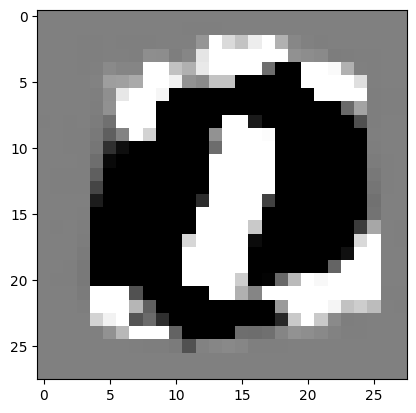

In [68]:
def optimizeHyperparameters(Xtrain,ytrain,Xval,yval,lambda_values):
    # Initialize variables
    best_lambda = None
    best_misclass_val = float('inf')
    optimal_weights = None
    best_accuracy = None
    
    
    for lam in lambda_values:
        # Obtain weight vector from regularized logistic regression function
        weights = logisticRegressionWithRegularization(Xtrain,ytrain,lam=lam)
        
        # Test on validation set
        val_misclass,accuracy = testLinearClassifier(weights,Xval,yval)
        
        # Update if better than prior lambda
        if val_misclass < best_misclass_val:
            best_accuracy = accuracy
            best_misclass_val = val_misclass
            best_lambda = lam
            optimal_weights = weights
    
    lamopt = best_lambda
    
    return lamopt,optimal_weights

lambda_list = [.001,.01,.1,1,10,100,1000,1e6] # lambda to test in optimization function 
lamopt,optimizedLogisticRegression = optimizeHyperparameters(X_train,y_train,X_val,y_val,lambda_list) # Return most accurate weight vector from regularized logistic regression (step & iterations default)

test,test_accuracy = testLinearClassifier(optimizedLogisticRegression,X_test,y_test) # Testing optimized weight vector against test dataset
val,val_accuracy = testLinearClassifier(optimizedLogisticRegression,X_val,y_val) # Revalidating optimized weight vector
train,train_accuracy =testLinearClassifier(optimizedLogisticRegression,X_train,y_train) 

plt.imshow(np.reshape(optimizedLogisticRegression[:-1],(28,28)),cmap='gray',vmin=-1,vmax=1)
print("\nUsing best lambda: ",lamopt)


print(f'\ny4(x) Optimized Validation Misclassifications:  {val}, Optimized Validation Accuracy: {val_accuracy*100:.2f}%')
print(f"y4(x) Optimized Test Misclassifications:  {test}, Optimized Test Accuracy: {test_accuracy*100:.2f}%")


# Component 1.8
## REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW

In [69]:
print('\t\tREPORT SUMMARY\n-----------------------------------------------')
print('\ny1(x): gaussianClassifierWithIdentityCovariance')
a1 = gaussianClassifierWithIdentityCovariance(X_train,y_train)
train,tacc = testLinearClassifier(a1,X_train,y_train)
val,vacc = testLinearClassifier(a1,X_val,y_val)
test,testacc = testLinearClassifier(a1,X_test,y_test)
print(f'\t-y1(x) Train misclassifications:  {train}, Training Accuracy: {tacc*100:.2f}%')
print(f'\t-y1(x) Validation Misclassifications:  {val}, Validation Accuracy: {vacc*100:.2f}%')
print(f"\t-y1(x) Test Misclassifications:  {test}, Test Accuracy: {testacc*100:.2f}%")

print('\ny2(x): gaussianClassifierWithCommonCovariance')
a2 = gaussianClassifierWithCommonCovariance(X_train,y_train)
train,tacc = testLinearClassifier(a2,X_train,y_train)
val,vacc = testLinearClassifier(a2,X_val,y_val)
test,testacc = testLinearClassifier(a2,X_test,y_test)
print(f'\t-y2(x) Train misclassifications:  {train}, Training Accuracy: {tacc*100:.2f}%')
print(f'\t-y2(x) Validation Misclassifications:  {val}, Validation Accuracy: {vacc*100:.2f}%')
print(f"\t-y2(x) Test Misclassifications:  {test}, Test Accuracy: {testacc*100:.2f}%")


print('\ny3(x): logisticRegression')
a3 = logisticRegression(X_train,y_train,iterations=100)
train,tacc = testLinearClassifier(a3,X_train,y_train)
val,vacc = testLinearClassifier(a3,X_val,y_val)
test,testacc = testLinearClassifier(a3,X_test,y_test)
print(f'\t-y3(x) Train misclassifications:  {train}, Training Accuracy: {tacc*100:.2f}%')
print(f'\t-y3(x) Validation Misclassifications:  {val}, Validation Accuracy: {vacc*100:.2f}%')
print(f"\t-y3(x) Test Misclassifications:  {test}, Test Accuracy: {testacc*100:.2f}%")

print('\ny4(x): logisticRegressionWithRegularization (not optimized)')
a4 = logisticRegressionWithRegularization(X_train,y_train,iterations=100,lam=0)
train,tacc = testLinearClassifier(a4,X_train,y_train)
val,vacc = testLinearClassifier(a4,X_val,y_val)
test,testacc = testLinearClassifier(a4,X_test,y_test)
print(f'\t-y4(x) Train misclassifications:  {train}, Training Accuracy: {tacc*100:.2f}%')
print(f'\t-y4(x) Validation Misclassifications:  {val}, Validation Accuracy: {vacc*100:.2f}%')
print(f"\t-y4(x) Test Misclassifications:  {test}, Test Accuracy: {testacc*100:.2f}%")

print('\ny4(x): logisticRegressionWithRegularization (optimized lambda = 100)')
test,test_accuracy = testLinearClassifier(optimizedLogisticRegression,X_test,y_test) # Testing optimized weight vector against test dataset
val,val_accuracy = testLinearClassifier(optimizedLogisticRegression,X_val,y_val) # Revalidating optimized weight vector
print(f'\t-y4(x) Optimized Validation Misclassifications:  {val}, Optimized Validation Accuracy: {val_accuracy*100:.2f}%')
print(f"\t-y4(x) Optimized Test Misclassifications:  {test}, Optimized Test Accuracy: {test_accuracy*100:.2f}%")




		REPORT SUMMARY
-----------------------------------------------

y1(x): gaussianClassifierWithIdentityCovariance
	-y1(x) Train misclassifications:  70, Training Accuracy: 99.32%
	-y1(x) Validation Misclassifications:  14, Validation Accuracy: 99.05%
	-y1(x) Test Misclassifications:  22, Test Accuracy: 99.26%

y2(x): gaussianClassifierWithCommonCovariance
Complete your code
cov shape:  (784, 784)
	-y2(x) Train misclassifications:  22, Training Accuracy: 99.79%
	-y2(x) Validation Misclassifications:  3, Validation Accuracy: 99.80%
	-y2(x) Test Misclassifications:  5, Test Accuracy: 99.83%

y3(x): logisticRegression
	-y3(x) Train misclassifications:  16, Training Accuracy: 99.85%
	-y3(x) Validation Misclassifications:  4, Validation Accuracy: 99.73%
	-y3(x) Test Misclassifications:  6, Test Accuracy: 99.80%

y4(x): logisticRegressionWithRegularization (not optimized)
	-y4(x) Train misclassifications:  16, Training Accuracy: 99.85%
	-y4(x) Validation Misclassifications:  4, Validation Acc

# Component 2.1 
## Split multiclass into subsets: 70% training, 10% validation, 20% test

In [70]:
# # X_train, X_temp, y_train, y_temp = train_test_split(X, y,test_size=0.3, random_state=2)

# # # Second split - 30% temporary into 20% test and 10% validation
# # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=2) 

# # # X_train & y_train = 70%, X_test & y_test = 20%, X_val & y_val = 10%

# # Nsamples = X_train.shape[0] # samples
# # Nfeatures = X_train.shape[1] # features

X_train, X_temp, y_train, y_temp = train_test_split(X, y,test_size=0.3, random_state=10)
# Second split - 30% temporary into 20% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=10) 
# X_train & y_train = 70%, X_test & y_test = 20%, X_val & y_val = 10%
Nsamples = X_train.shape[0] # samples
Nfeatures = X_train.shape[1] # features




# Component 2.2 
## Gaussian multiclass classifier

In [71]:
import numpy as np

def gaussian_classifier_multi_class_identity(X,y):
    num_classes = 10
    classifiers = []
    

    
    
    
    for class_label in range(num_classes):
        binary_label = (y_train == class_label).astype(int)

       
        classifier = gaussian_classifier_identity(X_train,binary_label)
        classifiers.append(classifier)

    return classifiers

def gaussian_classifier_identity(X, y):
    # Separate the data into two classes (0 and 1)
    X_class_0 = X[y == 0]
    X_class_1 = X[y == 1]

    # Calculate the means for each class
    mean_0 = np.mean(X_class_0, axis=0)
    mean_1 = np.mean(X_class_1, axis=0)

    # Discriminant weights
    w = mean_1 - mean_0
    w0 = 0.5 * (np.dot(mean_0, mean_0) - np.dot(mean_1, mean_1))

    # Combine w and w0 into a single vector a
    a = np.concatenate([w, np.array([w0])])

    return a

def predict_multi_class_gaussian_identity(X, classifiers):
    num_classes = len(classifiers)
    num_samples = X.shape[0]
    scores_matrix = np.zeros((num_samples, num_classes))

    for class_label, classifier in enumerate(classifiers):
        # Calculate discriminant scores for the current class
        scores_matrix[:, class_label] = np.dot(X, classifier[:-1]) + classifier[-1]

    # Predict the class with the highest score for each sample
    predictions = np.argmax(scores_matrix, axis=1)
    
    return predictions


# Train Gaussian classifier with identity covariance for multi-class
    
gaussian_classifiers_identity = gaussian_classifier_multi_class_identity(X_train,y_train)


# Predict on the test set
predictions_gaussian_identity = predict_multi_class_gaussian_identity(X_test, gaussian_classifiers_identity)

# Evaluate accuracy
accuracy_gaussian_identity = np.mean(predictions_gaussian_identity == y_test)
print("Accuracy of Gaussian Classifier with Identity Covariance (Multi-class): {:.2%}".format(accuracy_gaussian_identity))


Accuracy of Gaussian Classifier with Identity Covariance (Multi-class): 80.24%


# Component 2.3 Multiclass Logistic Regression

In [72]:
import numpy as np

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

def logistic_regression_multi_class(X_train, y_train, learning_rate=1e-4, regularization_param=1, num_iterations=100):
    num_classes = len(np.unique(y_train))
    weights_matrix = np.zeros((X_train.shape[1] + 1, num_classes))

    for class_label in range(num_classes):
        # Create a binary label vector for the current class
        binary_labels = (y_train == class_label).astype(int)

        # Train a logistic regression classifier for the current class
        weights= logisticRegressionWithRegularization(X_train, binary_labels, step_size=learning_rate, lam=regularization_param, iterations=num_iterations)
        weights_matrix[:, class_label] = np.concatenate([weights[:-1], np.array([0])])  # Include bias term in weights

    return weights_matrix

def predict_multi_class_logistic(X, weights_matrix):
    scores_matrix = np.dot(np.concatenate([X, np.ones((X.shape[0], 1))], axis=1), weights_matrix)

    # Predict the class with the highest score for each sample
    predictions = np.argmax(scores_matrix, axis=1)

    return predictions



# Train Logistic Regression for multi-class
weights_matrix_logistic = logistic_regression_multi_class(X_train, y_train)

# Predict on the test set
predictions_logistic = predict_multi_class_logistic(X_test, weights_matrix_logistic)

# Evaluate accuracy
accuracy_logistic = np.mean(predictions_logistic == y_test)
print("Accuracy of Logistic Regression (Multi-class): {:.2%}".format(accuracy_logistic))


Accuracy of Logistic Regression (Multi-class): 82.15%


# Component 2.4 MCC Optimized Hyperparameters

In [73]:


# def logistic_regression_regularized_multi_class(X, y, weights_matrix, regularization_param):
#     num_classes = 10
#     num_samples = X.shape[0]
#     scores_matrix = np.dot(np.concatenate([X, np.ones((num_samples, 1))], axis=1), weights_matrix)

#     # Apply sigmoid function to get predicted probabilities
#     probabilities_matrix = expit(scores_matrix)

#     # Convert probabilities to binary predictions
#     predictions_matrix = (probabilities_matrix >= 0.5).astype(int)

#     # Evaluate the number of misclassifications
#     misclassifications = np.sum(predictions_matrix != y)

#     # Calculate accuracy
#     accuracy = 1 - misclassifications / num_samples

#     # Calculate the regularization term
#     regularization_term = (regularization_param / (2 * num_samples)) * np.sum(weights_matrix[:-1, :]**2)

#     # Calculate the total cost (negative log likelihood + regularization)
#     total_cost = -np.sum(y * np.log(probabilities_matrix) + (1 - y) * np.log(1 - probabilities_matrix)) / num_samples + regularization_term

#     return total_cost, misclassifications, accuracy

# def optimizeHyperparametersLogisticMultiClass(X_train, y_train, X_val, y_val, X_test, y_test, lambda_values, step_size=0.01, num_iterations=100):
#     best_lambda = None
#     best_misclassifications_val = float('inf')
#     optimal_weights_matrix = None
   
#     for regularization_param in lambda_values:
#         # Train logistic regression for multi-class
#         weights_matrix = logisticRegressionWithRegularization(X_train, y_train)
#         # Validate on the validation set
#         total_cost_val, misclassifications_val, _ = logistic_regression_regularized_multi_class(X_val, y_val, weights_matrix, regularization_param)
#         # Update if current lambda gives fewer misclassifications on validation set
#         if misclassifications_val < best_misclassifications_val:
#             best_misclassifications_val = misclassifications_val
#             best_lambda = regularization_param
#             optimal_weights_matrix = weights_matrix

#     # Evaluate on test set using the best lambda found on the validation set
#     total_cost_test, misclassifications_test, accuracy_test = logistic_regression_regularized_multi_class(X_test, y_test, optimal_weights_matrix, best_lambda)

#     print(f"Best Lambda (min misclassifications on validation set): {best_lambda}")
#     print(f"Number of Misclassifications on Test Set: {misclassifications_test}")
#     print(f"Accuracy on Test Set: {accuracy_test:.2%}")

#     return optimal_weights_matrix



# lambda_values = [0.001, 0.01, 0.1, 1, 10,100] 
# optimal_weights_matrix_logistic = optimizeHyperparametersLogisticMultiClass(X_train, y_train, X_val, y_val, X_test, y_test, lambda_values)


# Component 2.5 Test Linear MCC 

In [74]:
# Train Gaussian classifier with identity covariance for multi-class
    
gaussian_classifiers_identity = gaussian_classifier_multi_class_identity(X_train,y_train)


# Predict on the test set
predictions_gaussian_identity = predict_multi_class_gaussian_identity(X_test, gaussian_classifiers_identity)

# Evaluate accuracy
accuracy_gaussian_identity = np.mean(predictions_gaussian_identity == y_test)

# MCC misclass Gaussian:
test_misclass = np.sum(predictions_gaussian_identity != y_test)
#val_misclass = np.sum(predictions_gaussian_identity != y_val)

print("Accuracy of Gaussian MCClassifier with Identity Covariance (Multi-class): {:.2%}".format(accuracy_gaussian_identity))
print("MCC Gaussian test misclassifications: ", test_misclass)



# Train Logistic Regression for multi-class
weights_matrix_logistic = logistic_regression_multi_class(X_train, y_train)

# Predict on the test set
predictions_logistic = predict_multi_class_logistic(X_test, weights_matrix_logistic)

# Evaluate accuracy
accuracy_logistic = np.mean(predictions_logistic == y_test)
test_lr_misclass = np.sum(predictions_logistic != y_test)
print("Accuracy of Logistic Regression MCClassifier: {:.2%}".format(accuracy_logistic))
print("MCC Logistic Regression test misclassifications: ", test_lr_misclass)

Accuracy of Gaussian MCClassifier with Identity Covariance (Multi-class): 80.24%
MCC Gaussian test misclassifications:  2767
Accuracy of Logistic Regression MCClassifier: 82.15%
MCC Logistic Regression test misclassifications:  2499
